In [21]:
library(survminer)
library(ggplot2)
library(survival)
library(dplyr)

In [22]:
library(stringr)

In [121]:
Tumor_tpm <- readRDS('03.data_matrix/data_tpm_Tumor2.Rdata')

In [122]:
head(Tumor_tpm)

,9DW0030,9DW0038,9DW0039,9DW0049,9DW0052,9DW0056,9DW0064,9DW0068,9DW0073,9DW0074,⋯,9DW0344,9DW0348,9DW0351,9DW0362,9DW0368,9DW0377,9DW0378,9DW0380,9DW0383,9DW0388
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
A1BG,4.13193541,2.23702643,2.2775711,10.5174504,4.73786386,2.75236504,1.42813533,0.8138736,5.264407e+00,1.3748517,⋯,1.9406748,0.5352383,4.193682,1.12770888,0.92168906,3.21580697,3.63446545,1.95534970,1.35603644,1.537741e+00
A1CF,0.14034996,0.00000000,5.6383384,16.9949316,1.99041135,4.77578757,0.06641905,7.2455942,1.838645e-02,0.3051556,⋯,8.0058769,0.0000000,24.575024,0.00000000,28.97305076,0.06464236,0.08367284,1.53740091,0.04142831,1.327318e+00
A2M,664.87145437,453.71492417,901.8983728,43.1738284,622.44177314,281.07679997,378.87975228,323.7577710,2.529891e+02,179.9502030,⋯,484.2194194,502.1193930,125.026221,793.02234326,15.04758901,679.94680744,769.58219090,216.60536296,489.35437427,4.656747e+02
A2ML1,0.18825138,0.03778991,0.0720440,0.0320472,0.06476454,0.03099209,0.00000000,0.0000000,8.220581e-03,0.1620166,⋯,1.7670509,0.2667963,0.000000,0.03735021,0.07852265,0.04729352,0.01726621,0.39979791,0.00000000,7.036883e-03
A3GALT2,0.05724589,0.19823081,0.1259714,0.0000000,0.15099065,0.21676286,0.24923698,0.0000000,5.749586e-02,0.2385613,⋯,0.0559233,0.0000000,0.000000,0.00000000,0.10983961,0.00000000,0.00000000,0.04905685,0.11104245,0.000000e+00
A4GALT,27.50534133,32.96320483,38.9406789,11.2362008,23.92751527,19.77185098,13.26463475,16.0639487,2.407714e+01,6.3936411,⋯,26.9271418,46.9255320,12.884461,30.53692520,1.04816872,29.26490566,34.40649467,8.14257556,40.58224732,2.119480e+01


In [123]:
colnames(Tumor_tpm) <- colnames(Tumor_tpm) %>% str_replace('X','') 

In [124]:
head(Tumor_tpm)

,9DW0030,9DW0038,9DW0039,9DW0049,9DW0052,9DW0056,9DW0064,9DW0068,9DW0073,9DW0074,⋯,9DW0344,9DW0348,9DW0351,9DW0362,9DW0368,9DW0377,9DW0378,9DW0380,9DW0383,9DW0388
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
A1BG,4.13193541,2.23702643,2.2775711,10.5174504,4.73786386,2.75236504,1.42813533,0.8138736,5.264407e+00,1.3748517,⋯,1.9406748,0.5352383,4.193682,1.12770888,0.92168906,3.21580697,3.63446545,1.95534970,1.35603644,1.537741e+00
A1CF,0.14034996,0.00000000,5.6383384,16.9949316,1.99041135,4.77578757,0.06641905,7.2455942,1.838645e-02,0.3051556,⋯,8.0058769,0.0000000,24.575024,0.00000000,28.97305076,0.06464236,0.08367284,1.53740091,0.04142831,1.327318e+00
A2M,664.87145437,453.71492417,901.8983728,43.1738284,622.44177314,281.07679997,378.87975228,323.7577710,2.529891e+02,179.9502030,⋯,484.2194194,502.1193930,125.026221,793.02234326,15.04758901,679.94680744,769.58219090,216.60536296,489.35437427,4.656747e+02
A2ML1,0.18825138,0.03778991,0.0720440,0.0320472,0.06476454,0.03099209,0.00000000,0.0000000,8.220581e-03,0.1620166,⋯,1.7670509,0.2667963,0.000000,0.03735021,0.07852265,0.04729352,0.01726621,0.39979791,0.00000000,7.036883e-03
A3GALT2,0.05724589,0.19823081,0.1259714,0.0000000,0.15099065,0.21676286,0.24923698,0.0000000,5.749586e-02,0.2385613,⋯,0.0559233,0.0000000,0.000000,0.00000000,0.10983961,0.00000000,0.00000000,0.04905685,0.11104245,0.000000e+00
A4GALT,27.50534133,32.96320483,38.9406789,11.2362008,23.92751527,19.77185098,13.26463475,16.0639487,2.407714e+01,6.3936411,⋯,26.9271418,46.9255320,12.884461,30.53692520,1.04816872,29.26490566,34.40649467,8.14257556,40.58224732,2.119480e+01


In [125]:
phe <- read.table('128sample.allphe.txt',header=T,sep="\t")

In [126]:
rownames(phe) <- phe$sample

In [127]:
phe <- phe[intersect(phe$sample,colnames(Tumor_tpm)),]

In [128]:
Tumor_tpm['ERBB2',] %>% t() -> ERBB2_tumor

In [139]:
saveRDS(object = ERBB2_tumor,file = "GCA_her2_RNA.Rdata")

In [129]:
rownames(ERBB2_tumor) %>% phe[.,] -> phe

In [130]:
phe$erbb2 <- ERBB2_tumor[,1]

In [131]:
phe2 <- phe[,c("year","status","erbb2")]

In [132]:
phe2 %>% mutate(group=case_when(erbb2<median(ERBB2_tumor[,1]) ~ 'Low',
                                erbb2>=median(ERBB2_tumor[,1]) ~ 'High',
                                         )) -> phe2

### only tumor

In [ ]:
options(repr.plot.height=6,repr.plot.width=6)
fit=survfit(Surv(year,status)~group,data=phe2)
#pdf(file = "GCA_RNAseq_survival.pdf",width = 6,height = 6,onefile=F)

In [144]:
?ggsurvplot

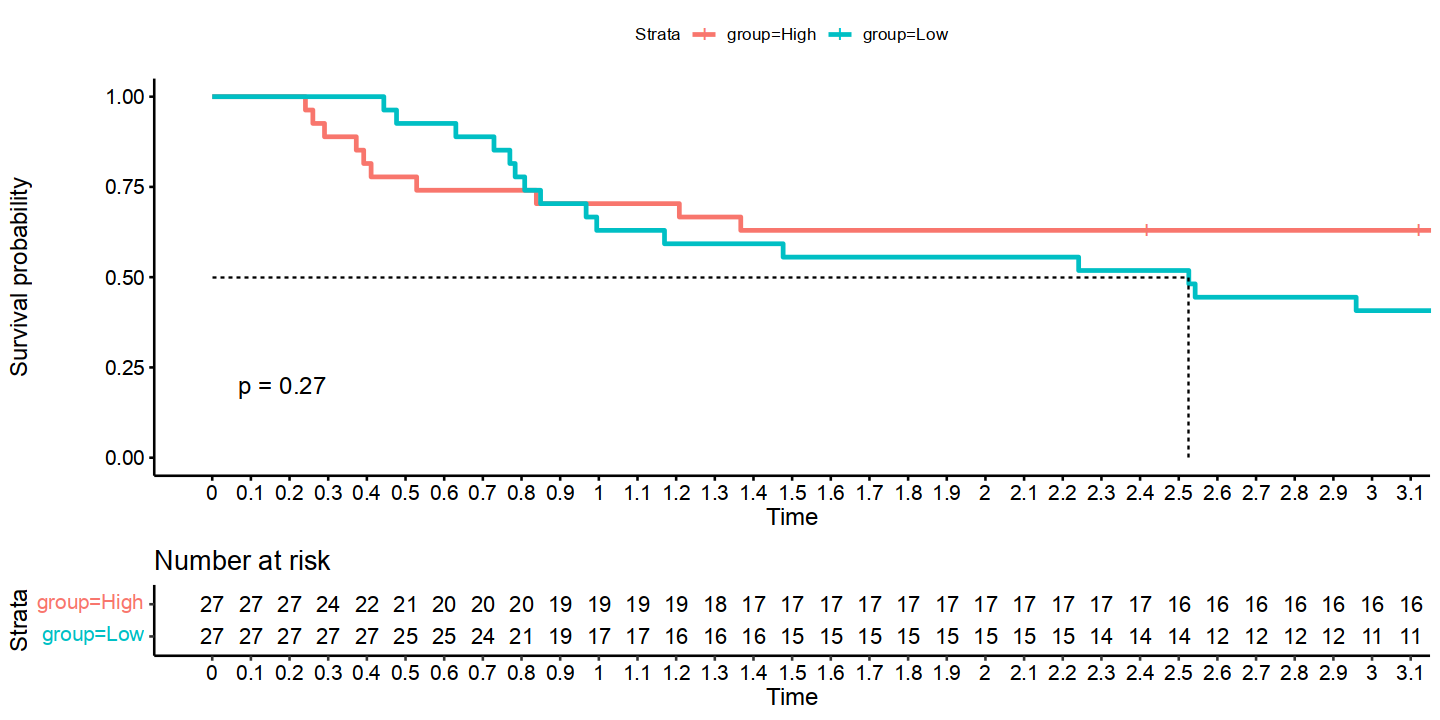

In [148]:
options(repr.plot.height=6,repr.plot.width=12)
ggsurvplot(fit,pval = T,risk.table = TRUE,surv.median.line = "hv",break.time.by=0.1)
#dev.off()
#ggsurvplot(fit,pval = T,risk.table = TRUE,surv.median.line = "hv",break.x.by=200)

In [134]:
saveRDS(object = phe2,file = "phe2_for_renyi.Rdata")

### ratio of Tumor/Normal

In [ ]:
options(repr.plot.height=6,repr.plot.width=6)
fit=survfit(Surv(year,status)~group_ratio,data=phe2)
#pdf(file = "ATAC_survival.pdf",width = 6,height = 6,onefile=F)
ggsurvplot(fit,pval = T,risk.table = TRUE,surv.median.line = "hv")
#dev.off()
#ggsurvplot(fit,pval = T,risk.table = TRUE,surv.median.line = "hv",break.x.by=200)

In [95]:
saveRDS(object = phe3, file="RNAseqErbb2Grouping.Rdata" )

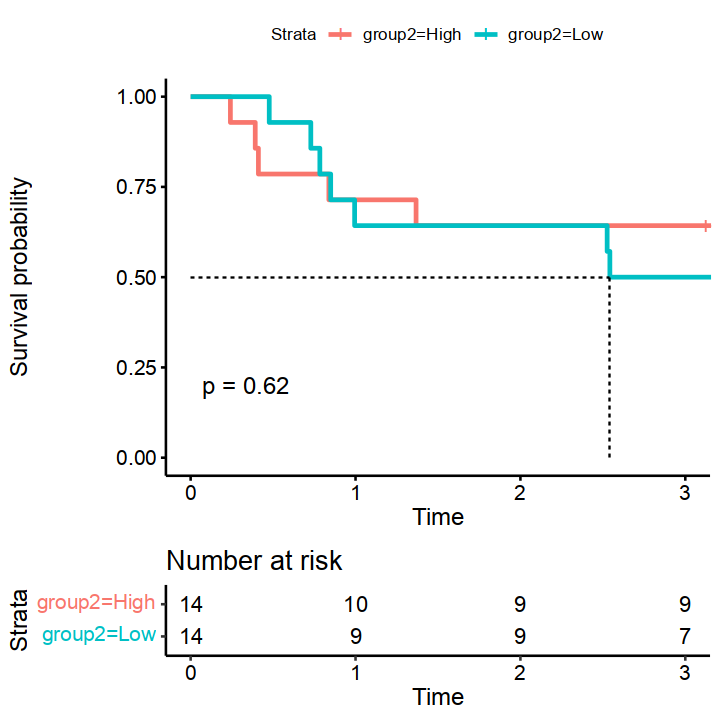

In [58]:
options(repr.plot.height=6,repr.plot.width=6)
fit=survfit(Surv(year,status)~group2,data=phe4)
#pdf(file = "ATAC_survival.pdf",width = 6,height = 6,onefile=F)
ggsurvplot(fit,pval = T,risk.table = TRUE,surv.median.line = "hv")
#dev.off()
#ggsurvplot(fit,pval = T,risk.table = TRUE,surv.median.line = "hv",break.x.by=200)

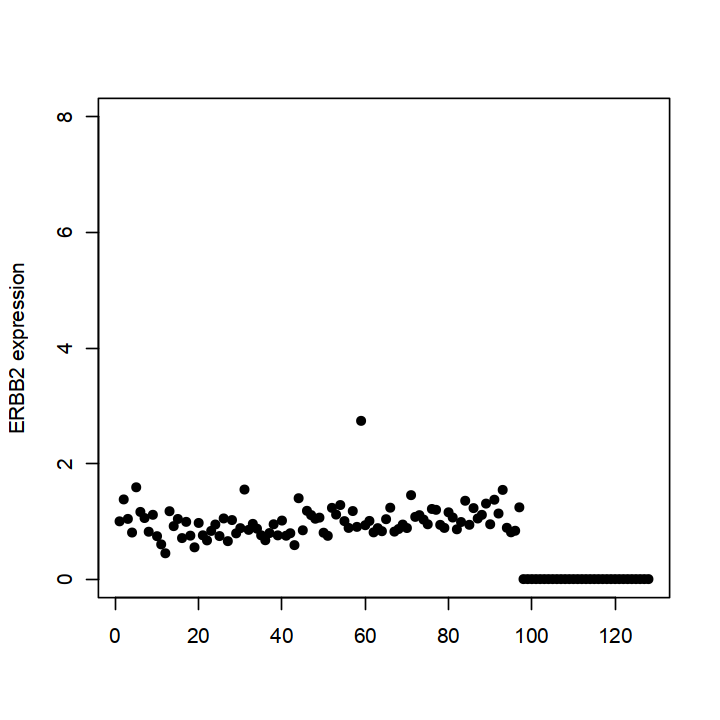

In [160]:
plot(phe$ms_normal[order(phe$ms_ratio,decreasing = TRUE)],pch=16,ylim=c(0,8),xlab=c(""),ylab=c("ERBB2 expression"))

In [155]:
plot(phe$ms_tumor,log2(phe$erbb2))

ERROR: Error in log2(phe$erbb2): non-numeric argument to mathematical function


In [78]:
a <- phe$ms_tumor

In [82]:
a[is.na(a)] = 0

In [85]:
a

[1] 1.224 2.233 1.198 1.567 2.187 0.938 1.219 1.597 1.423 1.513 1.709 1.302
[13] 1.044 1.213 1.339 3.775 1.273 9.385 5.458 1.022 1.056 0.856 0.841 0.861
[25] 1.249 0.947 1.104 0.913 1.101 1.232 2.984 0.972 0.950 0.922 1.085 1.388
[37] 1.415 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000
[49] 0.000 0.000 0.000 0.000 0.000 0.000

In [86]:
cor(phe$erbb2,a)

[1] 0.6933848

In [76]:
log2(phe$erbb2)

[1] 10.75738 13.46849 13.70081 13.36503 12.50267 12.96088 12.10859 14.23559
 [9] 10.84654 12.01057 12.99676 11.87983 12.83624 13.39816 13.26679 17.42959
[17] 12.38917 16.86657 18.28996 13.42738 14.28571 11.44502 12.72681 12.13050
[25] 12.21872 12.40659 13.26671 13.05581 11.84638 12.10087 15.09007 12.58583
[33] 12.50370 12.17385 11.92702 11.93356 14.23397 12.18932 11.39991 13.15275
[41] 11.63913 11.34608 11.75276 11.76150 13.04466 13.30167 13.13109 11.48419
[49] 12.67508 11.62580 12.74626 11.10990 10.65354 11.57202

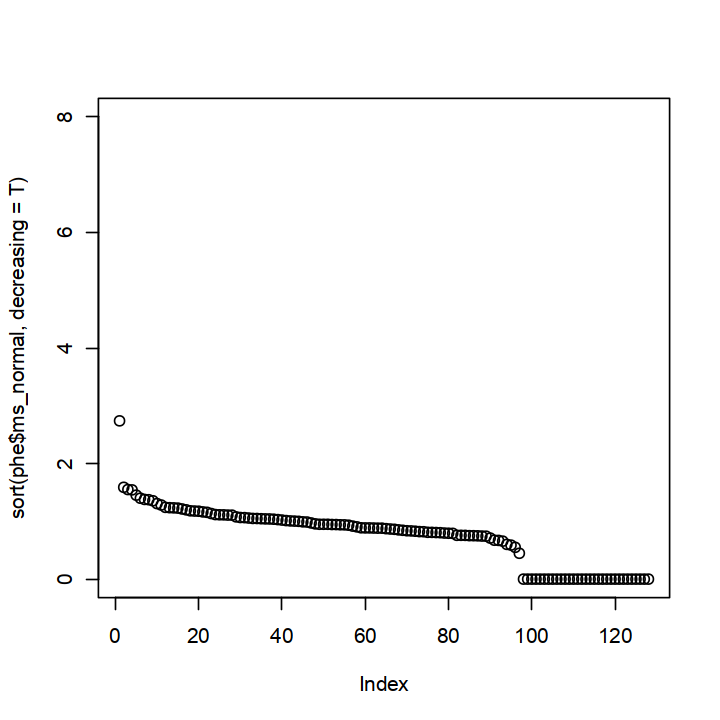

In [143]:
plot(sort(phe$ms_normal,decreasing = T),ylim=c(0,8))

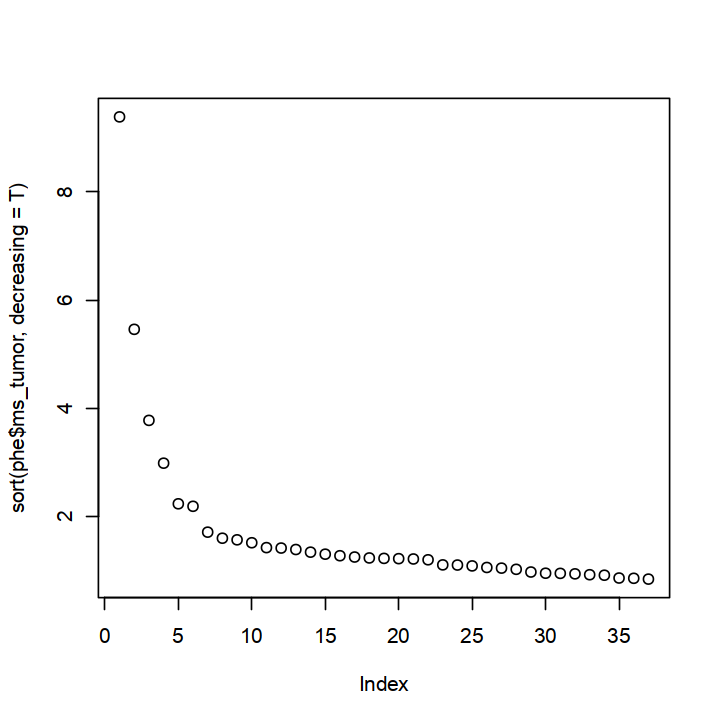

In [73]:
plot(sort(phe$ms_tumor,decreasing = T))

In [137]:
phe$ms_tumor[is.na(phe$ms_tumor)] = 0

In [138]:
phe$ms_normal[is.na(phe$ms_normal)] = 0

In [139]:
phe %>% mutate(group=case_when(ms_tumor<median(ms_tumor) ~ 'Low',
                                ms_tumor>=median(ms_tumor) ~ 'High',
                                         )) -> phe_protein_tumor

In [140]:
phe %>% mutate(group=case_when(ms_tumor<median(ms_normal) ~ 'Low',
                                ms_tumor>=median(ms_normal) ~ 'High',
                                         )) -> phe_protein_normal

Warning message in .add_surv_median(p, fit, type = surv.median.line, fun = fun, :
“Median survival not reached.”


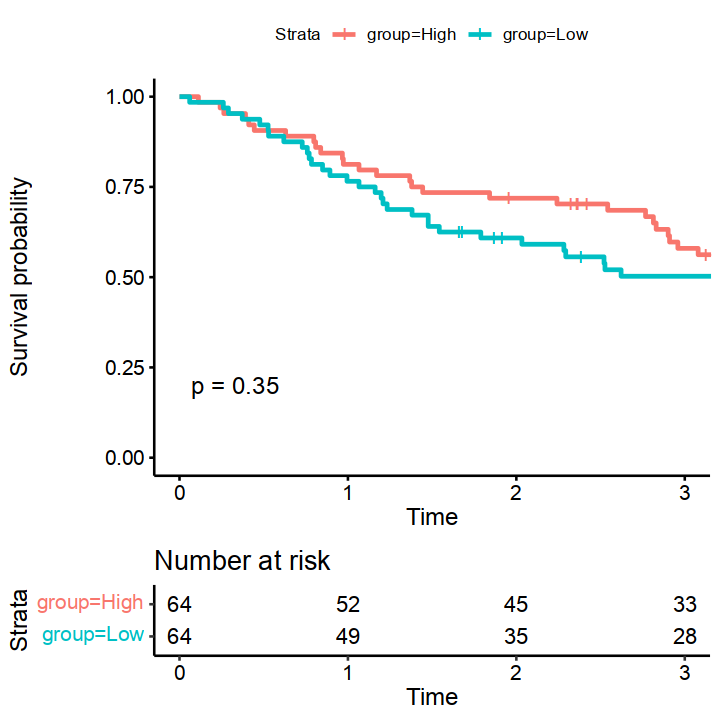

In [141]:
options(repr.plot.height=6,repr.plot.width=6)
fit=survfit(Surv(year,status)~group,data=phe_protein_tumor)
#pdf(file = "ATAC_survival.pdf",width = 6,height = 6,onefile=F)
ggsurvplot(fit,pval = T,risk.table = TRUE,surv.median.line = "hv")
#dev.off()
#ggsurvplot(fit,pval = T,risk.table = TRUE,surv.median.line = "hv",break.x.by=200)

Warning message in .add_surv_median(p, fit, type = surv.median.line, fun = fun, :
“Median survival not reached.”


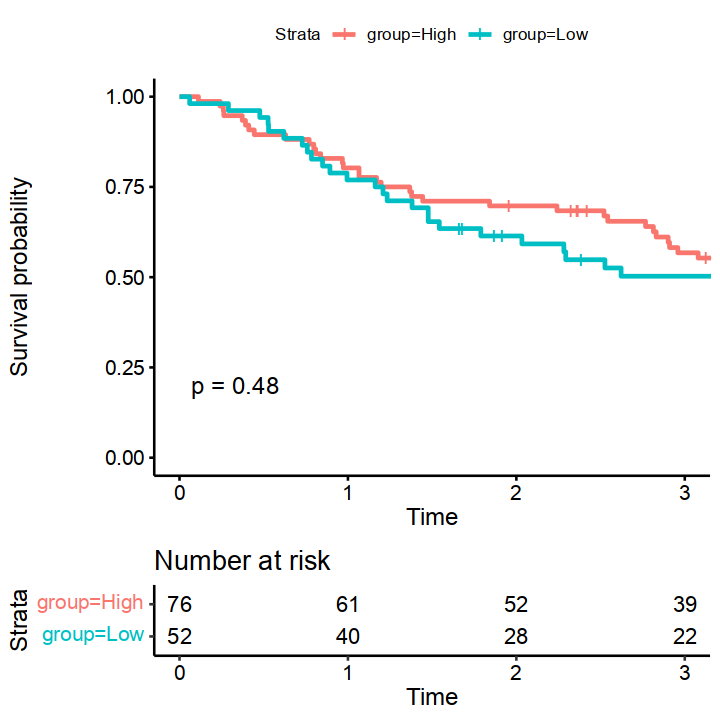

In [142]:
options(repr.plot.height=6,repr.plot.width=6)
fit=survfit(Surv(year,status)~group,data=phe_protein_normal)
#pdf(file = "ATAC_survival.pdf",width = 6,height = 6,onefile=F)
ggsurvplot(fit,pval = T,risk.table = TRUE,surv.median.line = "hv")
#dev.off()
#ggsurvplot(fit,pval = T,risk.table = TRUE,surv.median.line = "hv",break.x.by=200)